In [ ]:
!pip install -q tflite-model-maker
!pip install -q pycocotools

     |████████████████████████████████| 593kB 2.9MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 849kB 28.9MB/s 
     |████████████████████████████████| 1.1MB 30.1MB/s 
     |████████████████████████████████| 6.3MB 32.8MB/s 
     |████████████████████████████████| 686kB 40.4MB/s 
     |████████████████████████████████| 1.2MB 43.4MB/s 
     |████████████████████████████████| 174kB 37.1MB/s 
     |████████████████████████████████| 112kB 44.9MB/s 
     |████████████████████████████████| 645kB 39.8MB/s 
     |████████████████████████████████| 92kB 8.6MB/s 
     |████████████████████████████████| 122kB 39.7MB/s 
     |████████████████████████████████| 38.2MB 65kB/s 
     |████████████████████████████████| 102kB 11.6MB/s 
     |████████████████████████████████| 358kB 33.9MB/s 
     |████████████████████████████████| 194kB 28.7MB/s 


In [ ]:
!unzip ./drive/MyDrive/train.zip -d ./drive/MyDrive

Archive:  ./drive/MyDrive/train.zip
replace ./drive/MyDrive/train/.ipynb_checkpoints/Untitled-checkpoint.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./drive/MyDrive/train/.ipynb_checkpoints/Untitled-checkpoint.ipynb  
  inflating: ./drive/MyDrive/train/A0_jpg.rf.292a080422ba984985192f413101af41.jpg  
  inflating: ./drive/MyDrive/train/A0_jpg.rf.a79ace20ea42b8f94360cef8aaec4030.jpg  
  inflating: ./drive/MyDrive/train/A0_jpg.rf.beea8a405220871911fb117e36526deb.jpg  
  inflating: ./drive/MyDrive/train/A10_jpg.rf.470b1af0feaa190a2d29fcafd6fe747d.jpg  
  inflating: ./drive/MyDrive/train/A11_jpg.rf.4126b388a474440c970d85a3b2a7bf09.jpg  
  inflating: ./drive/MyDrive/train/A11_jpg.rf.bf055dc8a9a5a85bed0cc1f792c56a01.jpg  
  inflating: ./drive/MyDrive/train/A11_jpg.rf.ff2610c21c7f6d0a793cb58efc3bd96e.jpg  
  inflating: ./drive/MyDrive/train/A12_jpg.rf.84c6afc718de92ea268db5d3902ca2ba.jpg  
  inflating: ./drive/MyDrive/train/A12_jpg.rf.a6af764b7540d62daadf4d88cd39bf67.jpg  
  in

In [ ]:
import numpy as np
import os

from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [ ]:
spec = model_spec.get('efficientdet_lite1')
spec.tflite_max_detections = 1

In [ ]:
%cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
train_data, validation_data, test_data = object_detector.DataLoader.from_csv('./train/dataset.csv')

In [ ]:
model = object_detector.create(train_data, model_spec=spec, batch_size=8, train_whole_model=True,validation_data=validation_data)

Epoch 1/50
188/188 [==============================] - 180s 748ms/step - det_loss: 1.6469 - cls_loss: 1.3488 - box_loss: 0.0060 - reg_l2_loss: 0.0749 - loss: 1.7217 - learning_rate: 0.0090 - gradient_norm: 2.6337 - val_det_loss: 1.4181 - val_cls_loss: 1.2541 - val_box_loss: 0.0033 - val_reg_l2_loss: 0.0750 - val_loss: 1.4931
Epoch 2/50
188/188 [==============================] - 135s 717ms/step - det_loss: 1.0468 - cls_loss: 0.9101 - box_loss: 0.0027 - reg_l2_loss: 0.0752 - loss: 1.1220 - learning_rate: 0.0100 - gradient_norm: 3.1993 - val_det_loss: 0.8157 - val_cls_loss: 0.7544 - val_box_loss: 0.0012 - val_reg_l2_loss: 0.0754 - val_loss: 0.8911
Epoch 3/50
188/188 [==============================] - 135s 719ms/step - det_loss: 0.7665 - cls_loss: 0.6666 - box_loss: 0.0020 - reg_l2_loss: 0.0755 - loss: 0.8420 - learning_rate: 0.0099 - gradient_norm: 2.8337 - val_det_loss: 0.7216 - val_cls_loss: 0.6712 - val_box_loss: 0.0010 - val_reg_l2_loss: 0.0757 - val_loss: 0.7972
Epoch 4/50
188/188 [==

In [ ]:
model.evaluate(test_data)

2/2 [==============================] - 60s 13s/step



{'AP': 0.9043215,
 'AP50': 1.0,
 'AP75': 1.0,
 'AP_/A': 0.95977724,
 'AP_/B': -1.0,
 'AP_/C': 0.84638613,
 'AP_/D': 0.8693069,
 'AP_/E': 0.9,
 'AP_/F': 0.8631188,
 'AP_/G': 0.86633664,
 'AP_/H': 0.7787317,
 'AP_/I': 0.8422442,
 'AP_/J': 0.93366337,
 'AP_/K': 1.0,
 'AP_/L': 1.0,
 'AP_/M': 0.9168317,
 'AP_/N': 0.9,
 'AP_/O': 0.9306931,
 'AP_/P': 0.7983663,
 'AP_/Q': 1.0,
 'AP_/R': 0.9,
 'AP_/S': 0.9261669,
 'AP_/T': 0.91262376,
 'AP_/U': 0.8780057,
 'AP_/V': 0.95,
 'AP_/W': 0.9647965,
 'AP_/X': 0.8666667,
 'AP_/Y': -1.0,
 'AP_/Z': 0.9,
 'APl': 0.9043323,
 'APm': -1.0,
 'APs': -1.0,
 'ARl': 0.9286111,
 'ARm': -1.0,
 'ARmax1': 0.9061111,
 'ARmax10': 0.9286111,
 'ARmax100': 0.9286111,
 'ARs': -1.0}

In [ ]:
model.export(export_dir='./final_model_half/',export_format=[ExportFormat.TFLITE, ExportFormat.LABEL,ExportFormat.SAVED_MODEL])

In [ ]:
import cv2

from PIL import Image

model_path = './model_efficientdet_lite1/model.tflite'

# Load the labels into a list
classes = ['???'] * model.model_spec.config.num_classes
label_map = model.model_spec.config.label_map
for label_id, label_name in label_map.as_dict().items():
  classes[label_id-1] = label_name

# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  return resized_img, original_image


def set_input_tensor(interpreter, image):
  """Set the input tensor."""
  tensor_index = interpreter.get_input_details()[0]['index']
  input_tensor = interpreter.tensor(tensor_index)()[0]
  input_tensor[:, :] = image


def get_output_tensor(interpreter, index):
  """Retur the output tensor at the given index."""
  output_details = interpreter.get_output_details()[index]
  tensor = np.squeeze(interpreter.get_tensor(output_details['index']))
  return tensor


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""
  # Feed the input image to the model
  set_input_tensor(interpreter, image)
  interpreter.invoke()

  # Get all outputs from the model
  boxes = get_output_tensor(interpreter, 0)
  classes = get_output_tensor(interpreter, 1)
  scores = get_output_tensor(interpreter, 2)
  count = int(get_output_tensor(interpreter, 3))

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8

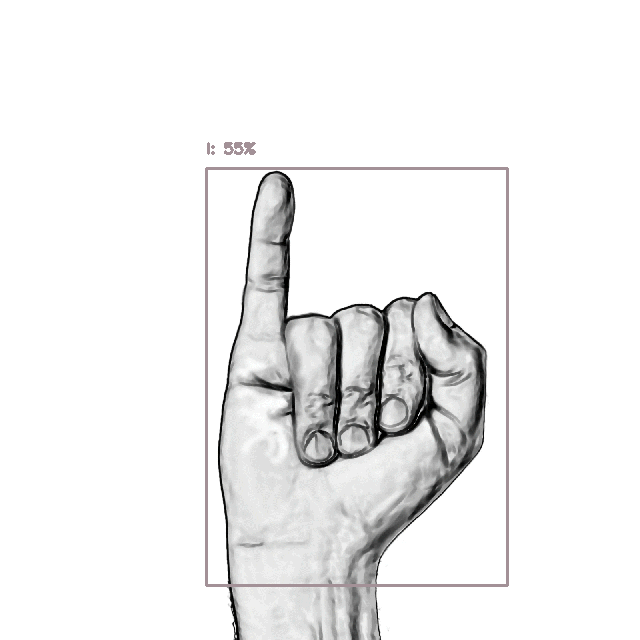

In [ ]:
INPUT_IMAGE_URL  = "https://www.lifeprint.com/asl101/fingerspelling/abc-gifs/i.gif"
DETECTION_THRESHOLD = 0.3
TEMP_FILE = '/tmp/image.png'

!wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
im = Image.open(TEMP_FILE)
im.thumbnail((640, 640), Image.ANTIALIAS)
im.save(TEMP_FILE, 'PNG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(
    TEMP_FILE,
    interpreter,
    threshold=DETECTION_THRESHOLD
)

# Show the detection result
Image.fromarray(detection_result_image)

In [ ]:
model.export(export_dir='./final_model/', export_format=[ExportFormat.LABEL])

In [ ]:
loss = []
val_loss = []
with open("./loss.txt","r") as lines:
  for line in lines:
    loss.append(float(line.rstrip()))
  lines.close()
print(loss)

[1.7217, 1.122, 0.842, 0.756, 0.6867, 0.6462, 0.6167, 0.5808, 0.5457, 0.5428, 0.5296, 0.4966, 0.4924, 0.4688, 0.4589, 0.4488, 0.4259, 0.4195, 0.4081, 0.3955, 0.394, 0.3798, 0.3617, 0.3511, 0.3493, 0.3455, 0.3281, 0.33, 0.3148, 0.3117, 0.3021, 0.2965, 0.2973, 0.2889, 0.2866, 0.2813, 0.2754, 0.2795, 0.2765, 0.2673, 0.2618, 0.2659, 0.2677, 0.265, 0.2644, 0.2681, 0.2614, 0.264, 0.2643, 0.2592]
